# Mass Shooting Incident Analysis

## Description
### This analysis examines patterns and trends in mass shooting incidents across the United States, focusing on temporal patterns, geographic distribution, and severity characteristics. The study aims to identify key factors that could inform prevention strategies and policy recommendations.

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Relevant Modules for the analysis are imported

In [2]:
data = pd.read_csv(r"C:\Users\ODOSA\Downloads\Data Analytics Archives\Datasets\History_of_Mass_Shootings_in_the_USA.csv")

In [3]:
data.head()

# First 5 rows of the dataset

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly a..."
1,2022-07-23,Chicago,Illinois,0,4,4,A man got out of a black truck and opened fire...
2,2022-07-22,Maquoketa,Iowa,4,0,4,Iowa State Park shooting: A man shot and kille...
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CV...
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot i..."


In [4]:
data.tail()

# last 5 rows of the dataset

,Date,City,State,Dead,Injured,Total,Description
2483,2018-01-07,Plantation,Florida,0,4,4,Four people were wounded while leaving a priva...
2484,2018-01-07,Union Springs,Alabama,1,5,6,A shooting on US Highway 29 led to the shootin...
2485,2018-01-05,Hattiesburg,Mississippi,0,6,6,Six people were wounded in a drive-by shooting...
2486,2018-01-04,Brinkley,Arkansas,1,3,4,A 33-year-old was killed and three others woun...
2487,2018-01-01,Huntsville,Alabama,1,3,4,A 21-year-old was killed and three others were...


## Data Cleaning

In [6]:
data.isna().sum()

# Checking for the total sum of empty/null values

Date           0
City           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

# Convert date to datetime

In [8]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_week'] = data['Date'].dt.day_name()

# Add derived time-based columns 

In [9]:
numeric_cols = ['Dead', 'Injured', 'Total']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Ensure numeric columns are properly typed

In [10]:
data.head()

# First 5 rows of the Dataset

,Date,City,State,Dead,Injured,Total,Description,Year,Month,Day_of_week
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly a...",2022,7,Saturday
1,2022-07-23,Chicago,Illinois,0,4,4,A man got out of a black truck and opened fire...,2022,7,Saturday
2,2022-07-22,Maquoketa,Iowa,4,0,4,Iowa State Park shooting: A man shot and kille...,2022,7,Friday
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CV...,2022,7,Thursday
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot i...",2022,7,Tuesday


In [11]:
data.tail()

# Last 5 rows of the Dataset

,Date,City,State,Dead,Injured,Total,Description,Year,Month,Day_of_week
2483,2018-01-07,Plantation,Florida,0,4,4,Four people were wounded while leaving a priva...,2018,1,Sunday
2484,2018-01-07,Union Springs,Alabama,1,5,6,A shooting on US Highway 29 led to the shootin...,2018,1,Sunday
2485,2018-01-05,Hattiesburg,Mississippi,0,6,6,Six people were wounded in a drive-by shooting...,2018,1,Friday
2486,2018-01-04,Brinkley,Arkansas,1,3,4,A 33-year-old was killed and three others woun...,2018,1,Thursday
2487,2018-01-01,Huntsville,Alabama,1,3,4,A 21-year-old was killed and three others were...,2018,1,Monday


## Analyzing temporal patterns and Trends

In [14]:
yearly_stats = data.groupby('Year').agg({
        'Dead': ['count', 'sum', 'mean'],
        'Injured': ['sum', 'mean'],
        'Total': ['sum', 'mean']
    }).round(2)

# Annual Trends

In [15]:
yearly_stats

Dead            Injured       Total      
     count  sum  mean     sum  mean   sum  mean
Year                                           
2018   322  383  1.19    1291  4.01  1673  5.20
2019   442  524  1.19    1758  3.98  2283  5.17
2020   616  522  0.85    2548  4.14  3070  4.98
2021   696  704  1.01    2843  4.08  3544  5.09
2022   412  447  1.08    1705  4.14  2152  5.22

In [26]:
 monthly_stats = data.groupby('Month').agg({
        'Dead': ['count', 'sum', 'mean'],
        'Injured': ['sum', 'mean']
    }).round(2)
    
# Monthly Trends

In [27]:
monthly_stats

Dead            Injured      
      count  sum  mean     sum  mean
Month                               
1       153  191  1.25     559  3.65
2       150  217  1.45     559  3.73
3       166  172  1.04     676  4.07
4       204  213  1.04     800  3.92
5       268  274  1.02    1197  4.47
6       345  301  0.87    1470  4.26
7       341  301  0.88    1419  4.16
8       220  205  0.93     977  4.44
9       181  175  0.97     705  3.90
10      187  205  1.10     751  4.02
11      152  183  1.20     576  3.79
12      121  143  1.18     456  3.77

In [24]:
dow_stats = data.groupby('Day_of_week').agg({
        'Dead': ['count', 'sum', 'mean'],
        'Injured': ['sum', 'mean']
    }).round(2)

# Day of week trends

In [25]:
dow_stats

Dead            Injured      
            count  sum  mean     sum  mean
Day_of_week                               
Friday        275  287  1.04    1080  3.93
Monday        272  312  1.15    1007  3.70
Saturday      562  511  0.91    2476  4.41
Sunday        687  652  0.95    3021  4.40
Thursday      241  275  1.14     896  3.72
Tuesday       214  262  1.22     825  3.86
Wednesday     237  281  1.19     840  3.54

## Analyzing geographic patterns and high-risk areas

In [28]:
state_stats = data.groupby('State').agg({
        'Dead': ['count', 'sum', 'mean'],
        'Injured': ['sum', 'mean'],
        'Total': ['sum', 'mean']
    }).round(2)

# State Level Analysis

In [30]:
state_stats

Dead            Injured        Total       
                          count  sum  mean     sum   mean   sum   mean
State                                                                 
Alabama                      69   72  1.04     261   3.78   333   4.83
Alaska                        4    6  1.50      12   3.00    18   4.50
Arizona                      27   42  1.56     115   4.26   156   5.78
Arkansas                     33   34  1.03     137   4.15   171   5.18
California                  191  251  1.31     753   3.94  1004   5.26
Colorado                     44   60  1.36     167   3.80   227   5.16
Connecticut                  16    8  0.50      62   3.88    70   4.38
Delaware                     13   13  1.00      45   3.46    58   4.46
District of Columbia          5    2  0.40      19   3.80    21   4.20
Florida                     129  149  1.16     530   4.11   679   5.26
Georgia                      87   82  0.94     345   3.97   427   4.91
Hawaii                        2    4  2.00       4   2.00     8   4.00
Idaho                         2    5  2.50       7   3.50    12   6.00
Illinois                    265  184  0.69    1174   4.43  1358   5.12
Indiana                      52   70  1.35     200   3.85   270   5.19
Iowa                         17   22  1.29      64   3.76    86   5.06
Kansas                       12    9  0.75      51   4.25    60   5.00
Kentucky                     30   33  1.10     126   4.20   159   5.30
Louisiana                   115   91  0.79     487   4.23   578   5.03
Maine                         1    3  3.00       1   1.00     4   4.00
Maryl                        76   70  0.92     289   3.80   359   4.72
Massachusetts                19   13  0.68      75   3.95    88   4.63
Michigan                     85   94  1.11     298   3.51   392   4.61
Minnesota                    27   19  0.70     132   4.89   151   5.59
Mississippi                  48   60  1.25     183   3.81   244   5.08
Missouri                     77   74  0.96     299   3.88   373   4.84
Montana                       2    5  2.50       4   2.00     9   4.50
Nebraska                      9    5  0.56      42   4.67    47   5.22
Nevada                       21   17  0.81      92   4.38   109   5.19
New Hampshire                 1    0  0.00       4   4.00     4   4.00
New Jersey                   52   34  0.65     250   4.81   284   5.46
New Mexico                   14   18  1.29      47   3.36    65   4.64
New York                    116   67  0.58     509   4.39   576   4.97
North Carolina               82  102  1.24     286   3.49   388   4.73
Ohio                         89   91  1.02     388   4.36   479   5.38
Oklahoma                     20   26  1.30      64   3.20    90   4.50
Oregon                       17   13  0.76      69   4.06    82   4.82
Pennsylvania                118   91  0.77     488   4.14   579   4.91
Peoria                        1    1  1.00      12  12.00    13  13.00
Puerto Rico                   3   15  5.00       1   0.33    16   5.33
Rhode Isl                     3    2  0.67      16   5.33    18   6.00
Santa Ana                     1    2  2.00       3   3.00     5   5.00
South Carolina               67   75  1.12     311   4.64   385   5.75
South Dakota                  2    4  2.00       5   2.50     9   4.50
Tennessee                    71   73  1.03     289   4.07   362   5.10
Texas                       187  292  1.56     765   4.09  1057   5.65
United States Virgin Isls     6    7  1.17      20   3.33    27   4.50
Utah                          4    6  1.50      12   3.00    18   4.50
Virginia                     53   56  1.06     209   3.94   263   4.96
Washington                   27   30  1.11     102   3.78   132   4.89
Washington D.C.              34   21  0.62     163   4.79   184   5.41
West Virginia                 5    9  1.80      16   3.20    25   5.00
Wisconsin                    36   46  1.28     140   3.89   186   5.17
Wyoming                       1    2  2.00       2 

In [32]:
state_state_sorted = state_stats.sort_values(('Dead','count'), ascending=False) 

# sort the states by the count of incidents in descending order

In [33]:
state_state_sorted

Dead            Injured        Total       
                          count  sum  mean     sum   mean   sum   mean
State                                                                 
Illinois                    265  184  0.69    1174   4.43  1358   5.12
California                  191  251  1.31     753   3.94  1004   5.26
Texas                       187  292  1.56     765   4.09  1057   5.65
Florida                     129  149  1.16     530   4.11   679   5.26
Pennsylvania                118   91  0.77     488   4.14   579   4.91
New York                    116   67  0.58     509   4.39   576   4.97
Louisiana                   115   91  0.79     487   4.23   578   5.03
Ohio                         89   91  1.02     388   4.36   479   5.38
Georgia                      87   82  0.94     345   3.97   427   4.91
Michigan                     85   94  1.11     298   3.51   392   4.61
North Carolina               82  102  1.24     286   3.49   388   4.73
Missouri                     77   74  0.96     299   3.88   373   4.84
Maryl                        76   70  0.92     289   3.80   359   4.72
Tennessee                    71   73  1.03     289   4.07   362   5.10
Alabama                      69   72  1.04     261   3.78   333   4.83
South Carolina               67   75  1.12     311   4.64   385   5.75
Virginia                     53   56  1.06     209   3.94   263   4.96
Indiana                      52   70  1.35     200   3.85   270   5.19
New Jersey                   52   34  0.65     250   4.81   284   5.46
Mississippi                  48   60  1.25     183   3.81   244   5.08
Colorado                     44   60  1.36     167   3.80   227   5.16
Wisconsin                    36   46  1.28     140   3.89   186   5.17
Washington D.C.              34   21  0.62     163   4.79   184   5.41
Arkansas                     33   34  1.03     137   4.15   171   5.18
Kentucky                     30   33  1.10     126   4.20   159   5.30
Arizona                      27   42  1.56     115   4.26   156   5.78
Minnesota                    27   19  0.70     132   4.89   151   5.59
Washington                   27   30  1.11     102   3.78   132   4.89
Nevada                       21   17  0.81      92   4.38   109   5.19
Oklahoma                     20   26  1.30      64   3.20    90   4.50
Massachusetts                19   13  0.68      75   3.95    88   4.63
Iowa                         17   22  1.29      64   3.76    86   5.06
Oregon                       17   13  0.76      69   4.06    82   4.82
Connecticut                  16    8  0.50      62   3.88    70   4.38
New Mexico                   14   18  1.29      47   3.36    65   4.64
Delaware                     13   13  1.00      45   3.46    58   4.46
Kansas                       12    9  0.75      51   4.25    60   5.00
Nebraska                      9    5  0.56      42   4.67    47   5.22
United States Virgin Isls     6    7  1.17      20   3.33    27   4.50
West Virginia                 5    9  1.80      16   3.20    25   5.00
District of Columbia          5    2  0.40      19   3.80    21   4.20
Alaska                        4    6  1.50      12   3.00    18   4.50
Utah                          4    6  1.50      12   3.00    18   4.50
Puerto Rico                   3   15  5.00       1   0.33    16   5.33
Rhode Isl                     3    2  0.67      16   5.33    18   6.00
South Dakota                  2    4  2.00       5   2.50     9   4.50
Montana                       2    5  2.50       4   2.00     9   4.50
Idaho                         2    5  2.50       7   3.50    12   6.00
Hawaii                        2    4  2.00       4   2.00     8   4.00
Peoria                        1    1  1.00      12  12.00    13  13.00
Santa Ana                     1    2  2.00       3   3.00     5   5.00
New Hampshire                 1    0  0.00       4   4.00     4   4.00
Maine                         1    3  3.00       1   1.00     4   4.00
Wyoming                       1    2  2.00       2 

In [42]:
city_stats = data.groupby(['State', 'City']).agg({
        'Dead': ['count', 'sum'],
    'Injured': ['count', 'sum'],
        'Total': 'sum'
    }).round(2).sort_values(('Total', 'sum'), ascending=False)

# City level analysis 

In [43]:
city_stats.head(20)

# first 20 rows

Dead      Injured      Total
                                count  sum   count  sum   sum
State           City                                         
Illinois        Chicago           196  111     196  877   988
Pennsylvania    Philadelphia       85   45      85  365   410
New York        New York City      64   27      64  286   313
Texas           Houston            53   68      53  186   254
Maryl           Baltimore          50   28      50  206   234
Louisiana       New Orleans        39   31      39  163   194
Washington D.C. Washington D.C.    34   21      34  163   184
Michigan        Detroit            34   28      34  128   156
Missouri        St. Louis          34   30      34  117   147
Georgia         Atlanta            29   14      29  133   147
Tennessee       Memphis            29   25      29  116   141
Indiana         Indianapolis       26   41      26   95   136
California      Los Angeles        27   21      27  108   129
Ohio            Cleveland          23   17      23  111   128
Texas           San Antonio        26   23      26   94   117
                Dallas             19   14      19  102   116
California      Oakland            23   13      23   94   107
Minnesota       Minneapolis        18    7      18   94   101
Wisconsin       Milwaukee          19   25      19   76   101
Florida         Miami              21   11      21   85    96

In [44]:
city_state_sorted = city_stats.sort_values(('Dead','count'), ascending=False) 

# sort the states by the count of incidents in descending order

In [46]:
city_state_sorted.head(20)

#first 20 rows

Dead      Injured      Total
                                count  sum   count  sum   sum
State           City                                         
Illinois        Chicago           196  111     196  877   988
Pennsylvania    Philadelphia       85   45      85  365   410
New York        New York City      64   27      64  286   313
Texas           Houston            53   68      53  186   254
Maryl           Baltimore          50   28      50  206   234
Louisiana       New Orleans        39   31      39  163   194
Michigan        Detroit            34   28      34  128   156
Missouri        St. Louis          34   30      34  117   147
Washington D.C. Washington D.C.    34   21      34  163   184
Georgia         Atlanta            29   14      29  133   147
Tennessee       Memphis            29   25      29  116   141
California      Los Angeles        27   21      27  108   129
Indiana         Indianapolis       26   41      26   95   136
Texas           San Antonio        26   23      26   94   117
Ohio            Cleveland          23   17      23  111   128
California      Oakland            23   13      23   94   107
Florida         Miami              21   11      21   85    96
Wisconsin       Milwaukee          19   25      19   76   101
Texas           Dallas             19   14      19  102   116
Minnesota       Minneapolis        18    7      18   94   101

##  Analyzing incident descriptions for patterns

In [50]:
 data['Description_Clean'] = data['Description'].str.lower()
    
# Basic text preprocessing

In [58]:
 from collections import Counter
import re
    
word_counts = Counter()
for desc in data['Description_Clean']:
        words = re.findall(r'\w+', str(desc))
        word_counts.update(words)
    
word_counts.most_common(20)

# Count common words in the description of each shooting incidents (excluding stop words)

[('a', 3927),
 ('were', 2062),
 ('in', 2001),
 ('and', 1996),
 ('the', 1809),
 ('people', 1306),
 ('wounded', 1187),
 ('shooting', 1112),
 ('at', 1046),
 ('four', 971),
 ('killed', 951),
 ('two', 895),
 ('injured', 863),
 ('was', 826),
 ('an', 757),
 ('three', 710),
 ('one', 662),
 ('of', 632),
 ('after', 609),
 ('shot', 585)]

## Statistical Analysis

In [78]:
correlation_dead_injured = data[['Dead', 'Injured']].corr()
correlation_dead_injured

# Correlation between dead and injured

,Dead,Injured
Dead,1.000000,-0.157754
Injured,-0.157754,1.000000


In [77]:
correlation_dead_total = data[['Dead', 'Total']].corr()
correlation_dead_total

# Correlation between dead and total casualties

,Dead,Total
Dead,1.000000,0.464414
Total,0.464414,1.000000


In [79]:
correlation_Injured_total = data[['Dead', 'Total']].corr()
correlation_Injured_total

# Correlation between Injured and total casualties

,Dead,Total
Dead,1.000000,0.464414
Total,0.464414,1.000000


In [62]:
observed = data['Month'].value_counts()
chi2, p_value = stats.chisquare(observed)

# Chi-square test for temporal patterns
# Example: Test if incidents are evenly distributed across months

In [63]:
observed

6     345
7     341
5     268
8     220
4     204
10    187
9     181
3     166
1     153
11    152
2     150
12    121
Name: Month, dtype: int64

In [64]:
chi2

290.5498392282958

In [65]:
p_value

8.559991795821537e-56

In [66]:
    weekday = data[data['Day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['Total']
    weekend = data[data['Day_of_week'].isin(['Saturday', 'Sunday'])]['Total']
    t_stat, t_p_value = stats.ttest_ind(weekday, weekend)
    
 # T-test comparing weekday vs weekend incidents

In [67]:
(t_stat, t_p_value)

(-4.250851829464028, 2.2081583107666784e-05)

## Data Visualizations

In [72]:
def generate_visualizations(df, yearly_stats, monthly_stats, state_stats):
    """
    Create key visualizations
    """
    # Set style
    plt.style.use('seaborn')
    
    # 1. Trend over time
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Annual trend
    yearly_stats[('Dead', 'sum')].plot(kind='line', ax=axes[0,0])
    axes[0,0].set_title('Annual Fatalities Over Time')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Number of Fatalities')
    
    # Monthly pattern
    monthly_stats[('Dead', 'sum')].plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Monthly Distribution of Fatalities')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Number of Fatalities')
    
    # State distribution
    state_stats[('Dead', 'sum')].sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Top 10 States by Fatalities')
    axes[1,0].set_xlabel('State')
    axes[1,0].set_ylabel('Number of Fatalities')
    
    
    plt.tight_layout()
    return fig

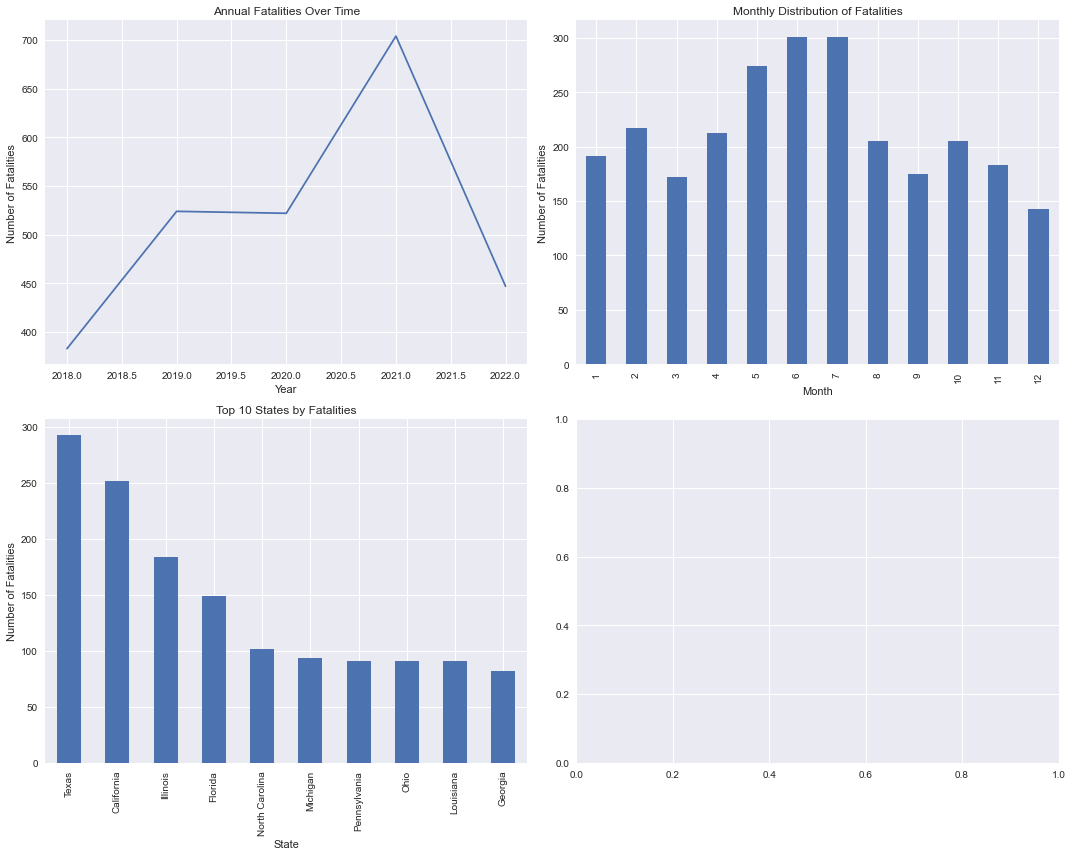

In [74]:
figures = generate_visualizations(data, yearly_stats, monthly_stats, state_stats)